# Load Python Libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [4]:
df = pd.read_csv('insurance.csv')
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Determine if any values in the data frame is missing

In [5]:
df.isna().sum() # df.isnull().sum also return the number of missing values, you can use either of them]

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df = df.fillna(0) # fill any missing values with 0

# Three of our variables, sex, smoker, and region, are categorical; we need to encode them so that our regression models can take their values as input

In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
le = LabelEncoder()

le.fit(df['sex'])
df['sex'] = le.transform(df['sex'])

le.fit(df['smoker'])
df['smoker'] = le.transform(df['smoker'])

le.fit(df['region'])
df['region'] = le.transform(df['region'])

df.head(10);

# Let's use pandas built-in function to compute pair-wise correlations

In [9]:
df.corr(method='pearson')['charges'].sort_values() # pearson: standard correlation coefficient

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

# It looks like a strong correlation is only observed with the fact that the patient is smoking or not

# Let's take a look at the distribution of the charges

/var/folders/1y/hb4mfpy5265f26j9ktdrzynm0000gq/T/ipykernel_3749/712700080.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df['charges'], palette='bright')


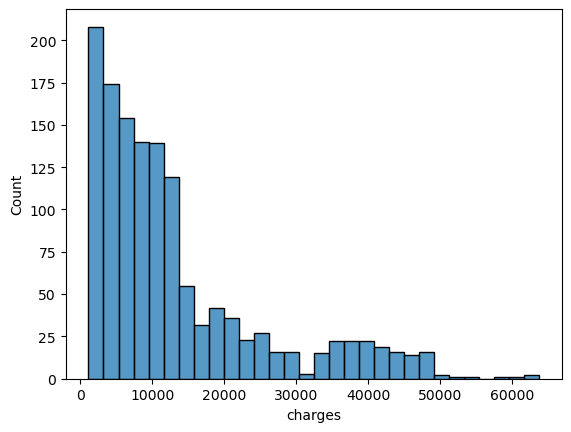

In [10]:
sns.histplot(data=df['charges'], palette='bright')
plt.show()

# Let's plot the charges distribution for both smokers and non-smokers

/var/folders/1y/hb4mfpy5265f26j9ktdrzynm0000gq/T/ipykernel_3749/107481755.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['smoker'] == 1]['charges'], color='c')
/var/folders/1y/hb4mfpy5265f26j9ktdrzynm0000gq/T/ipykernel_3749/107481755.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.dist

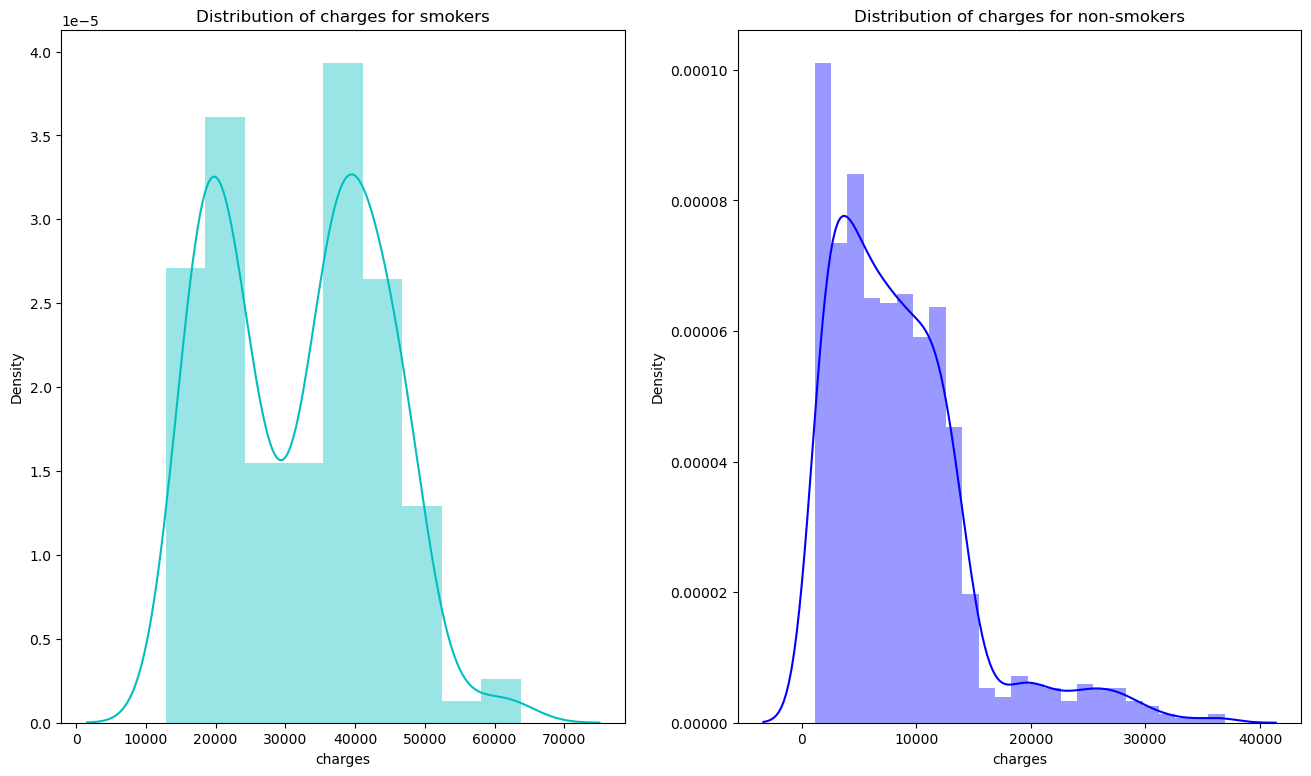

In [11]:
fig = plt.figure(figsize=(16,9))

ax1 = fig.add_subplot(121)
sns.distplot(df.loc[df['smoker'] == 1]['charges'], color='c')
ax1.set_title('Distribution of charges for smokers')

ax2 = fig.add_subplot(122)
sns.distplot(df.loc[df['smoker'] == 0]['charges'], color='b')
ax2.set_title('Distribution of charges for non-smokers')

plt.show()

# Let's compare the charges between males smokers and female smokers

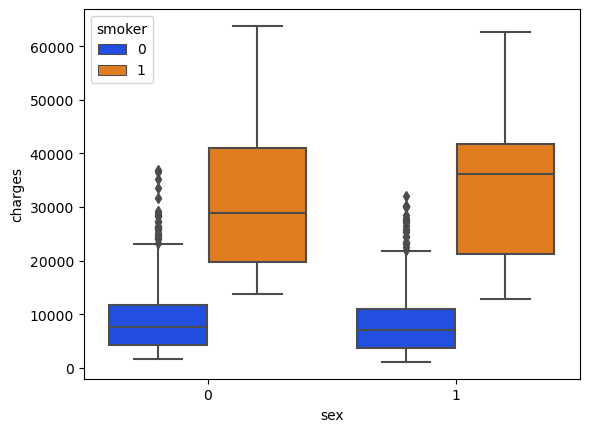

In [12]:
sns.boxplot(x="sex", y="charges", hue="smoker", data=df, palette='bright')
plt.show()

# Let's start with Ordinary Least Squres (OLS) Regression, which allows us to find the significant variables to predict charges.

In [13]:
import statsmodels.api as sm

y = df['charges'] # dependent variable
x = df.drop(columns='charges') # predictor variables

In [14]:
#add constant to predictor variables
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary());

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Thu, 26 Jan 2023   Prob (F-statistic):               0.00
Time:                        08:39:16   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.182e+04    955.130    -12.371      0.0

# Let's start with regression analysis

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error

In [16]:
x = df.drop(columns='charges')
y = df['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y)

## Lines

In [17]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print("The R square score of linear regression model is: ", lr.score(x_test,y_test))

The R square score of linear regression model is:  0.7676557085907432


## 2-order Polynomials

In [18]:
quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(x)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print("The R square score of 2-order polynomial regression model is: ", plr.score(X_test,Y_test))

The R square score of 2-order polynomial regression model is:  0.8846283666147687
